Video-tutorial in the Youtube channel BioPrograma https://www.youtube.com/channel/UCbJAU7N9FYvwkdgSwD_1S4Q

# Cellpose segmentation
links for learning more about Cellpose: 

https://www.youtube.com/watch?v=NcC0YxQ9o3A
https://www.nature.com/articles/s41592-020-01018-x
https://www.cellpose.org/
https://cellpose.readthedocs.io/en/latest/
https://cellpose.readthedocs.io/en/latest/notebook.html
https://www.nature.com/articles/s41592-020-01018-x

In [ ]:
#conda env create -f cellpose_bruni.yml

In [1]:
#import packages
import os
import glob
import matplotlib.pyplot as plt
from cellpose import models, io
from skimage.io import imread, imshow, imsave 
import matplotlib



In [2]:
print(os.getcwd())

C:\Users\bruni\OneDrive\Documents\BioPrograma


In [13]:
os.chdir('C:/Users/bruni/OneDrive/Documents/BioPrograma/Cellpose')
print(os.getcwd())

C:\Users\bruni\OneDrive\Documents\BioPrograma\Cellpose


In [37]:
img = imread('C:/Users/bruni/OneDrive/Documents/BioPrograma/Cellpose/test_1.tiff')

In [38]:
img.shape

(1040, 1392, 3)

(1040, 1392)


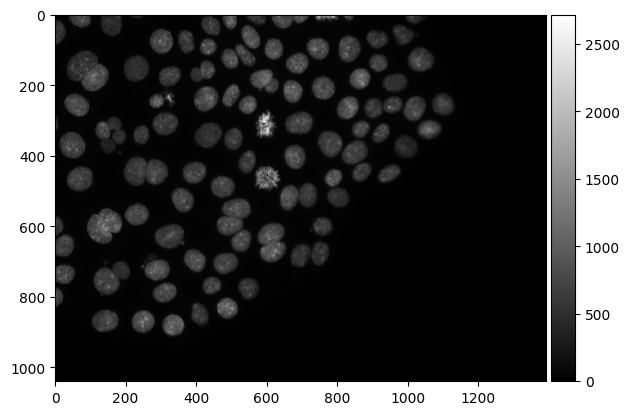

In [39]:
nucleo = img[:,:,0]
print(nucleo.shape)
imshow(nucleo, cmap='gray')

In [40]:
!mkdir = label_folder


A subdirectory or file label_folder already exists.


In [41]:
label_folder = 'C:/Users/bruni/OneDrive/Documents/BioPrograma/Cellpose/label_folder/'

In [42]:
model = models.Cellpose(gpu=True, model_type= 'nuclei')

# apply model

channels = [0,0] # This means we are processing single channel greyscale images.
label_image, flows, styles, diams = model.eval(nucleo, flow_threshold=0.8, diameter=40, channels=channels)


imsave(label_folder + 'label.tiff', label_image.astype('uint16'))
# show result


C:\Users\bruni\AppData\Local\Temp\ipykernel_5000\1809093677.py:9: UserWarning: C:/Users/bruni/OneDrive/Documents/BioPrograma/Cellpose/label_folder/label.tiff is a low contrast image
  imsave(label_folder + 'label.tiff', label_image.astype('uint16'))


In [ ]:
imshow(label_image)

In [43]:



#Function random_map by Guilhaume Witz to make a random cmap to label colors. No need to change anything here. You may save this function as random_cmap.py and call it if n
#https://github.com/guiwitz/neubias_academy_biapy/blob/master/16-Experiment_analysis.ipynb
#BSD 3-Clause License Copyright (c) 2021, University of Bern, Mathematical Institute and Microscopy Imaging Center, Guillaume Witz
def random_cmap():
    np.random.seed(42)
    cmap = matplotlib.colors.ListedColormap (np.random.rand(256,4))
    # value 0 should just be transparent
    cmap.colors[:,3] = 0.5
    cmap.colors[0,:] = 1
    cmap.colors[0,3] = 0


    # if image is a mask, color (last value) should be red
    cmap.colors[-1,0] = 1
    cmap.colors[-1,1:3] = 0
    return cmap


cmap = random_cmap()  


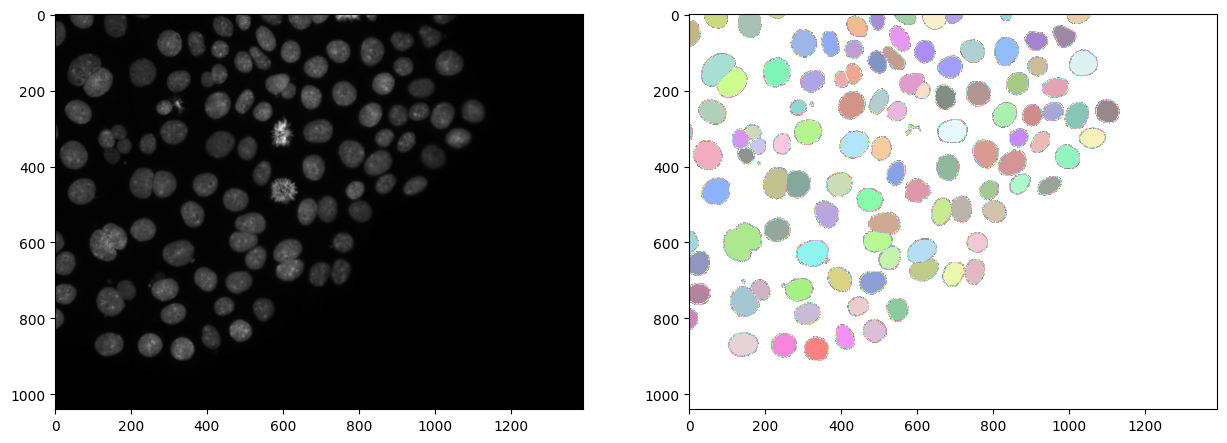

In [44]:

figs, axs = plt.subplots(1,2, figsize=(15,15))
axs[0].imshow(nucleo, cmap='gray')
axs[1].imshow(label_image, cmap=cmap)

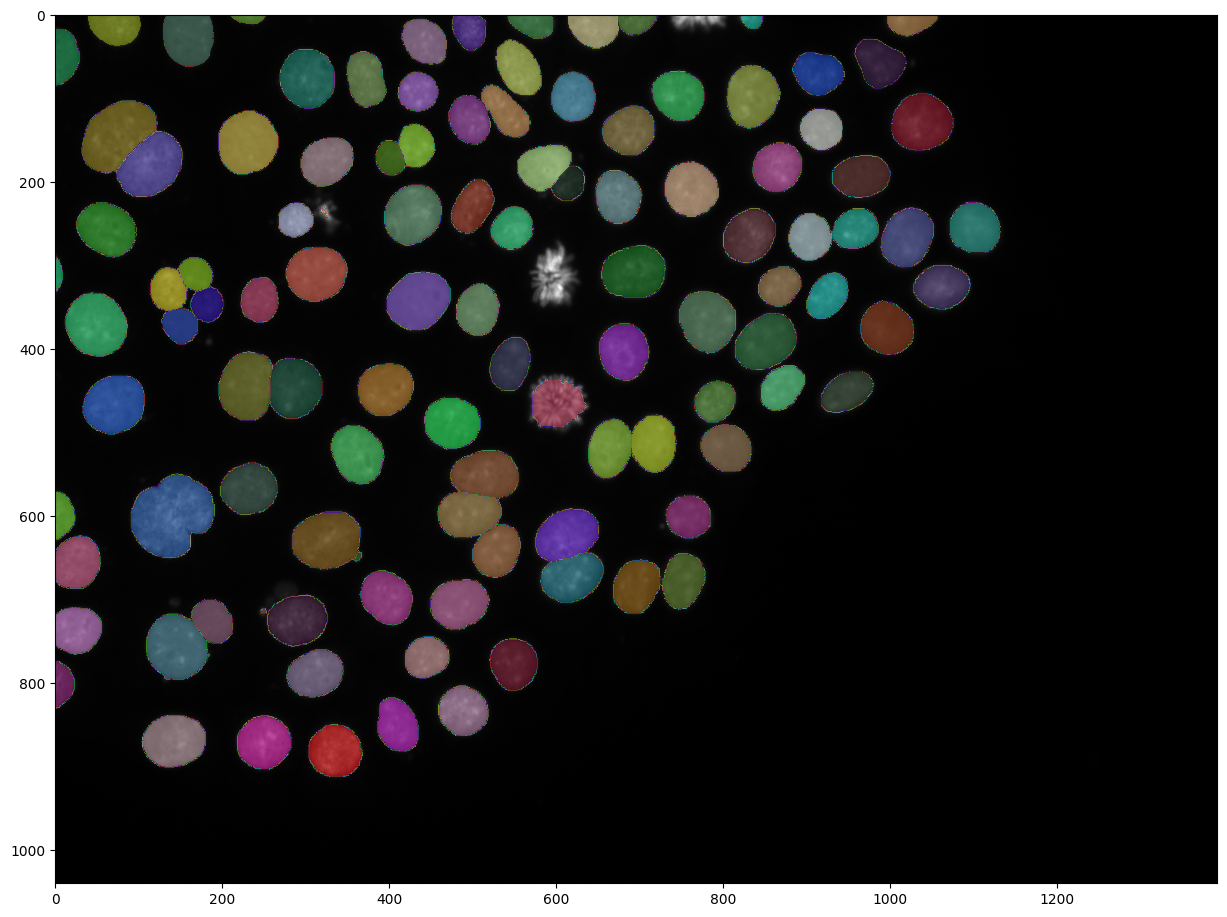

In [20]:
plt.figure(figsize=(15,15))
plt.imshow(nucleo, cmap='gray')
plt.imshow(label_image, cmap=cmap)

In [23]:
#batch
label_folder = "label_folder/"
!mkdir label_folder

file_paths = np.sort(glob.glob('/Users/bruni/OneDrive/Documents/BioPrograma/Cellpose/*test*.tiff'))

# load the cellpose model outside the loop
model = models.Cellpose(gpu=True, model_type='nuclei')
channels = [0,0] # This means we are processing single channel greyscale images for cellpose
# apply model to all images
for i in file_paths:
    print("Processing image:", i)
    image = imread(i)
    nucleo = image[:, :, 0]
      
      
    # apply cellpose model
    label_image, flows, styles, diams = model.eval(nucleo, flow_threshold=0.8, diameter=50, channels=channels)
    

    # save label_image as tiff
    imsave(os.path.join(label_folder, "label_" +  f"{os.path.splitext(os.path.basename(i))[0]}.tiff"), label_image.astype('uint16'))
    



Processing image: /Users/bruni/OneDrive/Documents/BioPrograma/Cellpose\test_1.tiff


C:\Users\bruni\AppData\Local\Temp\ipykernel_5000\4100894693.py:22: UserWarning: label_folder/label_test_1.tiff is a low contrast image
  imsave(os.path.join(label_folder, "label_" +  f"{os.path.splitext(os.path.basename(i))[0]}.tiff"), label_image.astype('uint16'))


Processing image: /Users/bruni/OneDrive/Documents/BioPrograma/Cellpose\test_2.tiff


C:\Users\bruni\AppData\Local\Temp\ipykernel_5000\4100894693.py:22: UserWarning: label_folder/label_test_2.tiff is a low contrast image
  imsave(os.path.join(label_folder, "label_" +  f"{os.path.splitext(os.path.basename(i))[0]}.tiff"), label_image.astype('uint16'))


Processing image: /Users/bruni/OneDrive/Documents/BioPrograma/Cellpose\test_3.tiff


C:\Users\bruni\AppData\Local\Temp\ipykernel_5000\4100894693.py:22: UserWarning: label_folder/label_test_3.tiff is a low contrast image
  imsave(os.path.join(label_folder, "label_" +  f"{os.path.splitext(os.path.basename(i))[0]}.tiff"), label_image.astype('uint16'))
